In [5]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from pandas_profiling import ProfileReport

# Načítanie a úprava dát z csv súborov.

In [6]:
def strip_columns(dataframe):
    for column_name in dataframe:
        if dataframe[column_name].dtypes == 'object':
            dataframe[column_name] = dataframe[column_name].str.strip()
        
    return dataframe

# other_train
df_other = pd.read_csv('./other_train.csv', sep=',', index_col=0) # First column is Unnamed
df_other = strip_columns(df_other)

In [7]:
df_other.info() # There are 22 columns. 10 atributes are float type and 12 are object.
# All columns expect name and adress have null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   race              3971 non-null   object 
 3   marital-status    3709 non-null   object 
 4   occupation        3968 non-null   object 
 5   pregnant          3967 non-null   object 
 6   education-num     3971 non-null   float64
 7   relationship      3972 non-null   object 
 8   skewness_glucose  3968 non-null   float64
 9   mean_glucose      3974 non-null   float64
 10  capital-gain      3964 non-null   float64
 11  kurtosis_glucose  3970 non-null   float64
 12  education         3969 non-null   object 
 13  fnlwgt            3965 non-null   float64
 14  class             3972 non-null   float64
 15  std_glucose       3966 non-null   float64
 16  income            3971 non-null   object 


V datasete je 22 atribútov, pričom 10 z nich sú typu float a zvyšných 12 je typu object.
Všetky stĺpce okrem name a adress majú chýbajúce hodnoty.

In [8]:
df_other.describe()

,education-num,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss
count,3971.000000,3968.000000,3974.000000,3964.000000,3970.000000,3.965000e+03,3972.000000,3966.000000,3971.000000,3971.000000
mean,10.065223,4.233223,69.173141,1228.128406,0.952248,1.911784e+05,0.256294,45.172793,40.505162,73.254092
std,2.671998,9.715162,3348.917032,8623.958204,1.614087,1.072410e+05,0.436641,7.621144,12.279149,369.551911
min,1.000000,-1.755332,-18973.437500,0.000000,-1.641515,1.882700e+04,0.000000,25.695250,1.000000,0.000000
25%,9.000000,-0.120081,83.955078,0.000000,0.070311,1.179830e+05,0.000000,40.151488,40.000000,0.000000
50%,10.000000,0.376026,110.613281,0.000000,0.311092,1.795090e+05,0.000000,45.878359,40.000000,0.000000
75%,13.000000,2.090854,125.382812,0.000000,0.776492,2.415230e+05,1.000000,50.350939,45.000000,0.000000
max,16.000000,68.101622,15887.500000,99999.000000,8.069522,1.366120e+06,1.000000,91.206475,99.000000,2824.000000


Štatistické údaje nie sú moc veľa vravné, pretože v nich sú celkom extrémne hodnoty.

In [9]:
df_other.head() 

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,David Hayes,235 Jennifer Throughway Suite 569\r\nNew Antho...,Black,??,Prof-specialty,f,5.0,Not-in-family,-0.197692,141.359375,0.0,-0.252430,9th,175431.0,0.0,49.842053,<=50K,"{'mean_oxygen':'4.04264214','std_oxygen':'19.4...",United-States,40.0,0.0,Private
1,Stanley Benny,"08954 Johnson Course\r\nNew Lauraville, NV 22019",White,Married-civ-spouse,Exec-managerial,f,13.0,Husband,16.019670,53.968750,0.0,3.149333,Bachelors,66473.0,1.0,31.900220,>50K,"{'mean_oxygen':'9.294314381','std_oxygen':'35....",United-States,40.0,0.0,Private
2,Domingo Labriola,"36319 Wiley Drive Suite 094\r\nSouth Michael, ...",Asian-Pac-Islander,Married-civ-spouse,Farming-fishing,f,3.0,Husband,21.803837,2257.812500,0.0,4.650770,5th-6th,93206.0,1.0,35.793158,<=50K,"{'mean_oxygen':'138.7876254','std_oxygen':'79....",Philippines,40.0,0.0,Private
3,Ronnie Moore,"0755 Soto Oval Apt. 443\r\nWest Markside, TX 3...",White,Never-married,Other-service,FALSE,10.0,Not-in-family,-0.112191,110.046875,0.0,0.441957,Some-college,137604.0,0.0,53.876575,<=50K,"{'mean_oxygen':'3.100334448','std_oxygen':'17....",United-States,40.0,0.0,Private
4,Victor Mcjunkin,"95738 Keller Overpass\r\nKennedyland, MO 71071",White,NaN,Adm-clerical,f,10.0,Not-in-family,-0.309642,137.960938,0.0,-0.048518,Some-college,174592.0,0.0,51.885451,<=50K,"{'mean_oxygen':'4.203177258','std_oxygen':'23....",United-States,40.0,0.0,Private


medical_info je komplexný objekt, ktorý môže byť rozdelený do viacerých stĺpcov.

In [10]:
df_other.shape[0] - df_other.dropna().shape[0]

337

Dataframe obsahuje 337 chýbajcich hodnôt.

In [11]:
def adjust_dataframe_columns(dataframe):
    dataframe['marital-status'] = dataframe['marital-status'].replace('??', np.nan)
    dataframe['occupation'] = dataframe['occupation'].replace('?', np.nan)
    dataframe['pregnant'] = dataframe['pregnant'].replace(['f', 'F', 'FALSE'], 'False')
    dataframe['pregnant'] = dataframe['pregnant'].replace(['t', 'T', 'TRUE'], 'True')
    dataframe['relationship'] = dataframe['relationship'].replace('Not_in_family', 'Not-in-family')
    dataframe['relationship'] = dataframe['relationship'].replace('Own_child', 'Own-child')
    dataframe['relationship'] = dataframe['relationship'].replace('Other_relative', 'Other-relative')
    dataframe['native-country'] = dataframe['native-country'].replace('?', np.nan)
    dataframe['workclass'] = dataframe['workclass'].replace('?', np.nan)

    return dataframe

df_other = adjust_dataframe_columns(df_other)

V prvej fáze sme zanalyzovali, v ktorých stĺpcoch sa nachádzajú aké unikátne hodnoty. Tie, ktoré nám nič nehovorili ako napríklad otázniky sme nahradili hodnotami np.nan aby sa nám jednoduchšie nahrádzali. V prípade, keď stĺpec obsahoval viacero hodnôt, ktoré hovorili to isté, len boli inak napísené, tak sme ich nahradili jednotným označním(napríklad 'f', 'F', 'False' majú teraz jednotné označenie 'False'). 

In [12]:
def separate_and_delete_medical_info(dataframe):
    df2 = pd.DataFrame() 
    # Iterate through every row and take values from medical_info column
    for _,column_data in dataframe['medical_info'].iteritems(): 
        if isinstance(column_data, str): # If value isn't nan
            column_data = column_data[1:-1] # Delect curly brackets from start and end of string
            column_data_split = column_data.split(',') # Split string by comma

            row = {} 
            for name_value in column_data_split: # Iterate through split string
                name_value_split = name_value.split(':') # Split into name of column and value of column
                # Store value into dictionary with name of the column as a key
                row[name_value_split[0][1:-1]] = [np.float(name_value_split[1][1:-1])] # Get rid of '' by [1:-1]

            row_data_frame = pd.DataFrame(row) # Convert dictionary into DataFrame
            df2 = df2.append(row_data_frame, ignore_index=True) # Append row_data_frame into df2
        else: # Value is nan, append nan row into df2
            df2 = df2.append(pd.Series(np.nan), ignore_index=True)
            
    df2 = df2.drop(columns=[0]) # Drop last column

    # Add values from df2 to main df
    for column_name in df2.columns:
        dataframe[column_name] = df2[column_name]

    del dataframe['medical_info'] # medical info is already divided into another columns, so we can erase it

    return dataframe
    
df_other = separate_and_delete_medical_info(df_other)

Pomocou funkcie separate_and_delete_medical_info sme rozdelili hodnoty v stĺpci medical_info do viacerých atribútov, pričom nám tento stĺpec už nebol potrebný, takže sme ho mohli vymazať.

In [13]:
# personal_train
df_personal = pd.read_csv("./personal_train.csv", index_col=0, sep=',') # First column was Unnamend
for column_name in df_personal:
    if df_personal[column_name].dtypes == 'object':
        df_personal[column_name] = df_personal[column_name].str.strip()

In [14]:
df_personal.describe()

,age
count,3540.000000
mean,51.816949
std,11.914637
min,-1.000000
25%,44.000000
50%,52.000000
75%,60.000000
max,113.000000


Najmenšie hodnota je -1, čo nebude dobré, pretože sa jedná o vek. Presnosť ostatných vecí nie je možné z tohto tak ľahko posúdiť.

In [15]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3933 non-null   object 
 1   address        3933 non-null   object 
 2   age            3540 non-null   float64
 3   sex            3933 non-null   object 
 4   date_of_birth  3933 non-null   object 
dtypes: float64(1), object(4)
memory usage: 184.4+ KB


Dataframe obsahuje 3933 záznamov, pričom každý jeden má 5 atribútov.

age je jediný typu float, ostatné sú typu object.

age má 393 buniek s chýbajúcou hodnotou.

ostatné atribúty nemajú chýbajúce hodnoty.

In [16]:
df_personal.head()

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",63.0,Female,1956-10-02
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",58.0,Female,1961-05-14
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47.0,Male,1972-06-19
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",60.0,Female,1959-02-19
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",31.0,Female,1988-08-04


Atribút address je možné rozdeliť do viacerých stĺpcov(street, city, zip_code)

In [17]:
def separete_and_delete_address(dataframe):
    df_addresses = dataframe['address'].replace('\r', ',', regex=True)
    df_addresses = df_addresses.replace('\n', ' ', regex=True)
    df_addresses = df_addresses.str.split(',')

    cities = []
    streets = []
    zip_codes = []

    for address in df_addresses:
        if len(address) < 3: # these records have cities in address
            streets.append(address[0])
            cities.append(None)
            zip_codes.append(address[1])
        else: # these records don't have cities in address
            streets.append(address[0])
            cities.append(address[1])
            zip_codes.append(address[2])
    
    dataframe['street'] = streets
    dataframe['city'] = cities
    dataframe['zip_code'] = zip_codes

    dataframe = dataframe.drop('address', axis=1)

    return dataframe

df_personal = separete_and_delete_address(df_personal)

Pomocou funkcie separate_and_delete_address sme rozdelili hodnoty v stĺpci address do viacerých atribútov, pričom nám tento stĺpec už nebol potrebný, takže sme ho mohli vymazať.

In [18]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3933 non-null   object 
 1   age            3540 non-null   float64
 2   sex            3933 non-null   object 
 3   date_of_birth  3933 non-null   object 
 4   street         3933 non-null   object 
 5   city           3657 non-null   object 
 6   zip_code       3933 non-null   object 
dtypes: float64(1), object(6)
memory usage: 245.8+ KB


276 buniek v stĺpci city má chýbajúcu hodnotu.

In [19]:
df_personal.shape[0] - df_personal.dropna().shape[0] # there are 643 nan values

643

Dataframe obsahuje 643 chýbajúcich hodnôt.

In [20]:
# df_joined = df_other.join(df_personal.set_index('name'), on='name', how='left') # join other train and personal train on name
df_joined = df_other.merge(df_personal, on='name', how='left')

In [21]:
del df_joined['address'] # we can also erase disgusting address column, because we have it in detail from personal train

df_joined je nový dataframe, ktorý vznikol spojením dataframov other a personal.

In [22]:
df_joined.info() # There are 31 atributes. 16 are objects and the other 15 are floats. There are 3983 records

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   race              3971 non-null   object 
 2   marital-status    3570 non-null   object 
 3   occupation        3744 non-null   object 
 4   pregnant          3967 non-null   object 
 5   education-num     3971 non-null   float64
 6   relationship      3972 non-null   object 
 7   skewness_glucose  3968 non-null   float64
 8   mean_glucose      3974 non-null   float64
 9   capital-gain      3964 non-null   float64
 10  kurtosis_glucose  3970 non-null   float64
 11  education         3969 non-null   object 
 12  fnlwgt            3965 non-null   float64
 13  class             3972 non-null   float64
 14  std_glucose       3966 non-null   float64
 15  income            3971 non-null   object 
 16  native-country    3909 non-null   object 


df_joined obsahuje 31 atribútov, pričom 16 z nich sú typu object a zvyšných 15 je typu float. Dataframe má 3983 záznamov.

In [23]:
df_joined.describe()

,education-num,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen,age
count,3971.000000,3968.000000,3974.000000,3964.000000,3970.000000,3.965000e+03,3972.000000,3966.000000,3971.000000,3971.000000,3967.000000,3967.000000,3967.000000,3967.000000,3586.000000
mean,10.065223,4.233223,69.173141,1228.128406,0.952248,1.911784e+05,0.256294,45.172793,40.505162,73.254092,18.537297,31.183114,7.405864,91.191022,51.828779
std,2.671998,9.715162,3348.917032,8623.958204,1.614087,1.072410e+05,0.436641,7.621144,12.279149,369.551911,34.828662,22.262766,4.814843,108.575211,11.927593
min,1.000000,-1.755332,-18973.437500,0.000000,-1.641515,1.882700e+04,0.000000,25.695250,1.000000,0.000000,0.213211,7.370432,-2.597872,-1.976976,-1.000000
25%,9.000000,-0.120081,83.955078,0.000000,0.070311,1.179830e+05,0.000000,40.151488,40.000000,0.000000,2.065635,15.062338,3.628014,12.743507,44.000000
50%,10.000000,0.376026,110.613281,0.000000,0.311092,1.795090e+05,0.000000,45.878359,40.000000,0.000000,3.237458,20.594663,7.779635,68.358187,52.000000
75%,13.000000,2.090854,125.382812,0.000000,0.776492,2.415230e+05,1.000000,50.350939,45.000000,0.000000,12.679766,43.333643,10.260328,126.817691,60.000000
max,16.000000,68.101622,15887.500000,99999.000000,8.069522,1.366120e+06,1.000000,91.206475,99.000000,2824.000000,217.371238,110.642211,34.539844,1191.000837,113.000000


Moc veľa sa z týchto štatistických dáta nedá vyčítať, pretože majú veľa vychýlených hodnôt.

In [24]:
df_joined.shape[0] - df_joined.dropna().shape[0]

1258

Dataframe df_joined obsahuje 1258 chýbajúcich hodnôt.

In [25]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   race              3971 non-null   object 
 2   marital-status    3570 non-null   object 
 3   occupation        3744 non-null   object 
 4   pregnant          3967 non-null   object 
 5   education-num     3971 non-null   float64
 6   relationship      3972 non-null   object 
 7   skewness_glucose  3968 non-null   float64
 8   mean_glucose      3974 non-null   float64
 9   capital-gain      3964 non-null   float64
 10  kurtosis_glucose  3970 non-null   float64
 11  education         3969 non-null   object 
 12  fnlwgt            3965 non-null   float64
 13  class             3972 non-null   float64
 14  std_glucose       3966 non-null   float64
 15  income            3971 non-null   object 
 16  native-country    3909 non-null   object 


In [26]:
# profile = ProfileReport(df_joined, title="Pandas Profiling Report")
# profile

Na základe tohto výpisu sme zistili, že dataset obsahuje záznamy s rovnakými menami, pričom jeden záznam obsahoval hodnotu atribútu a druhý obsahoval NaN. Hodnoty NaN sme nahradili a vymazali sme duplikáty.

In [27]:
def drop_duplicates(data_frame):
    df1 = data_frame[data_frame.duplicated('name', keep=False)].sort_values('name')

    for i in range(0,len(df1.index),2):
        for (column_name1, column_data1), (_, column_data2) in zip(df1.iloc[i].iteritems(), df1.iloc[i + 1].iteritems()):
            if pd.isnull(column_data1):
                data_frame.loc[df1.iloc[i]['name'] == data_frame['name'], column_name1] = column_data2
            else:
                data_frame.loc[df1.iloc[i]['name'] == data_frame['name'], column_name1] = column_data1
            
    data_frame = data_frame.drop_duplicates()
    return data_frame

df_joined = drop_duplicates(df_joined)

Všimli sme si, že formát v stĺpci date_of_birth nie je jednotný, takže sme sa rozhodli z tohto dátamu extrahovať rok narodenia a následne dropnuť stĺpec date_of_birth.

In [28]:
def extract_year(data_frame):
    years = []
    for cell in data_frame['date_of_birth']:
        if re.match('^[0-9]{2}\-[0-9]{2}\-[0-9]{2}$', cell):
            year = cell[:2]
            years.append(float('19' + year))
        elif re.match('[0-9]{4}', cell):
            years.append(float(re.findall('[0-9]{4}', cell)[0]))
        elif re.match('^[0-9]{2}\/[0-9]{2}\/[0-9]{4}$', cell):
            years.append(float(cell[-4:]))
    
    data_frame['year_of_birth'] = years
    return data_frame.drop(columns=['date_of_birth'])
    
df_joined = extract_year(df_joined)

Keďže v datasete chýbal niektorým záznamom celkový vek(stĺpec age), tak sme na základe stĺpca year_of_birth, vypočítali ich aktuálny vek a nahradili chýbajúce hodnoty validnými. 

In [29]:
def calculate_age_from_year(data_frame):
    new_age = []
    for (age, data1), (year, data2) in zip(data_frame['age'].iteritems(), data_frame['year_of_birth'].iteritems()):
        if pd.isnull(data1):
            new_age.append(2020 - data2)
        else:
            new_age.append(data1)
            
    data_frame['age'] = new_age
    return data_frame
    
df_joined = calculate_age_from_year(df_joined)

In [30]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3982
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3933 non-null   object 
 1   race              3933 non-null   object 
 2   marital-status    3540 non-null   object 
 3   occupation        3710 non-null   object 
 4   pregnant          3933 non-null   object 
 5   education-num     3932 non-null   float64
 6   relationship      3933 non-null   object 
 7   skewness_glucose  3932 non-null   float64
 8   mean_glucose      3933 non-null   float64
 9   capital-gain      3931 non-null   float64
 10  kurtosis_glucose  3933 non-null   float64
 11  education         3933 non-null   object 
 12  fnlwgt            3931 non-null   float64
 13  class             3933 non-null   float64
 14  std_glucose       3931 non-null   float64
 15  income            3933 non-null   object 
 16  native-country    3874 non-null   object 


In [31]:
df_joined.describe()

,education-num,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen,age,year_of_birth
count,3932.000000,3932.000000,3933.000000,3931.000000,3933.000000,3.931000e+03,3933.000000,3931.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3933.000000,3933.000000
mean,10.073245,4.219811,63.696776,1237.183160,0.951283,1.911450e+05,0.255276,45.172534,40.535097,73.980671,18.479727,31.152712,7.414067,91.315050,51.936435,1966.993389
std,2.674246,9.679145,3358.120098,8659.340002,1.610970,1.073383e+05,0.436072,7.608810,12.301212,371.308180,34.793133,22.269962,4.812653,108.560937,11.820871,11.820308
min,1.000000,-1.755332,-18973.437500,0.000000,-1.641515,1.882700e+04,0.000000,25.695250,1.000000,0.000000,0.213211,7.370432,-2.597872,-1.976976,-1.000000,1906.000000
25%,9.000000,-0.120081,83.859375,0.000000,0.072144,1.179345e+05,0.000000,40.163947,40.000000,0.000000,2.064799,15.039457,3.636259,12.863954,45.000000,1959.000000
50%,10.000000,0.374657,110.539062,0.000000,0.310784,1.795120e+05,0.000000,45.869299,40.000000,0.000000,3.234532,20.564154,7.783017,68.505049,52.000000,1967.000000
75%,13.000000,2.083826,125.359375,0.000000,0.776762,2.416740e+05,1.000000,50.361097,45.000000,0.000000,12.635452,43.229414,10.263412,127.017151,60.000000,1974.000000
max,16.000000,68.101622,15887.500000,99999.000000,8.069522,1.366120e+06,1.000000,91.206475,99.000000,2824.000000,217.371238,110.642211,34.539844,1191.000837,113.000000,2020.000000


In [32]:
df_joined.head()

,name,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen,age,sex,street,city,zip_code,year_of_birth
0,David Hayes,Black,NaN,Prof-specialty,False,5.0,Not-in-family,-0.197692,141.359375,0.0,-0.252430,9th,175431.0,0.0,49.842053,<=50K,United-States,40.0,0.0,Private,4.042642,19.456469,6.410765,49.813954,45.0,Female,235 Jennifer Throughway Suite 569,New Anthonyland,PA 19524,1974.0
1,Stanley Benny,White,Married-civ-spouse,Exec-managerial,False,13.0,Husband,16.019670,53.968750,0.0,3.149333,Bachelors,66473.0,1.0,31.900220,>50K,United-States,40.0,0.0,Private,9.294314,35.958174,4.424007,19.868969,42.0,Male,08954 Johnson Course,New Lauraville,NV 22019,1977.0
2,Domingo Labriola,Asian-Pac-Islander,Married-civ-spouse,Farming-fishing,False,3.0,Husband,21.803837,2257.812500,0.0,4.650770,5th-6th,93206.0,1.0,35.793158,<=50K,Philippines,40.0,0.0,Private,138.787625,79.152788,-0.445270,-0.909086,46.0,Male,36319 Wiley Drive Suite 094,South Michael,WI 41806,1973.0
3,Ronnie Moore,White,Never-married,Other-service,False,10.0,Not-in-family,-0.112191,110.046875,0.0,0.441957,Some-college,137604.0,0.0,53.876575,<=50K,United-States,40.0,0.0,Private,3.100334,17.819373,8.434320,85.665564,53.0,Male,0755 Soto Oval Apt. 443,West Markside,TX 32737,1966.0
4,Victor Mcjunkin,White,NaN,Adm-clerical,False,10.0,Not-in-family,-0.309642,137.960938,0.0,-0.048518,Some-college,174592.0,0.0,51.885451,<=50K,United-States,40.0,0.0,Private,4.203177,23.949006,6.531796,45.866688,52.0,Female,95738 Keller Overpass,Kennedyland,MO 71071,1967.0


Distribúcia year_of_birth má normálový tvar bez úpravy, avšak je možné, že sa tam ocitli nejaké outliery, čo zistíme neskôr a následne ich nahradíme.

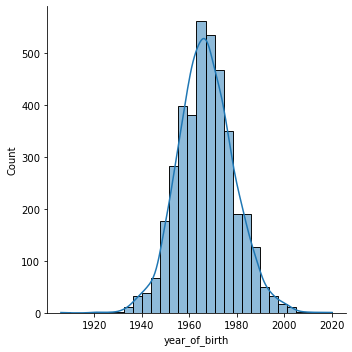

In [33]:
sns.displot(df_joined['year_of_birth'], kde=True, bins=30) # Distribution of age values, Positive kurtosis and normal skewness

Distribúcia age je po doplnení chýbajúcich hodnôt tiež normálového tvaru a s jej outliermi sa vysporiadame neskôr.

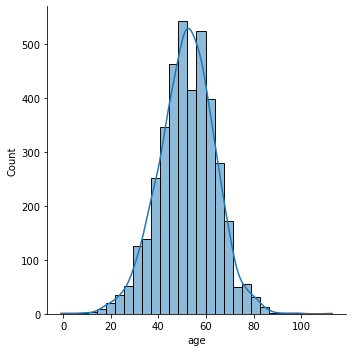

In [34]:
sns.displot(df_joined['age'], kde=True, bins=30) # Distribution of age values, Positive kurtosis and normal skewness

Dataset obsahoval 1243 chýbajúcich hodnôt a po odstranení duplikátov obsahuje 888.

In [35]:
df_joined.shape[0] - df_joined.dropna().shape[0] 

888

# Riešenie chýbajúcich hodnôt podľa stratégie priemeru

In [36]:
from sklearn.impute import SimpleImputer

copy_joined = df_joined.copy()
nan_map = copy_joined.isnull().any(axis=1)
copy_joined[nan_map]

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
copy_joined['age'] = imp.fit_transform(copy_joined[['age']])
copy_joined[nan_map]

df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3982
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3933 non-null   object 
 1   race              3933 non-null   object 
 2   marital-status    3540 non-null   object 
 3   occupation        3710 non-null   object 
 4   pregnant          3933 non-null   object 
 5   education-num     3932 non-null   float64
 6   relationship      3933 non-null   object 
 7   skewness_glucose  3932 non-null   float64
 8   mean_glucose      3933 non-null   float64
 9   capital-gain      3931 non-null   float64
 10  kurtosis_glucose  3933 non-null   float64
 11  education         3933 non-null   object 
 12  fnlwgt            3931 non-null   float64
 13  class             3933 non-null   float64
 14  std_glucose       3931 non-null   float64
 15  income            3933 non-null   object 
 16  native-country    3874 non-null   object 


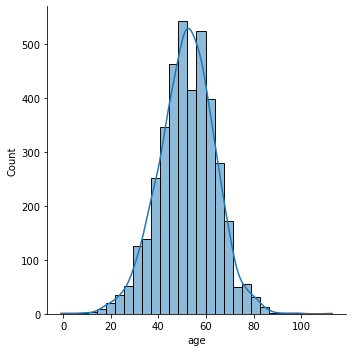

In [37]:
sns.displot(df_joined['age'], kde=True, bins=30) # Distribution of age values, Positive kurtosis and normal skewness

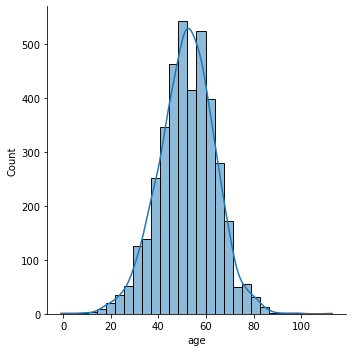

In [38]:
sns.displot(copy_joined['age'], kde=True, bins=30)

Po chýbajúce hodnoty pre atribút age sme nahradili priemerom celkového atribútu. Výsledkom je, že jeho rozdelenie je o dosť viac špicaté, takže sa ešte menej podobá na normálové rozdelenie ako pred doplnením chýbajúcich hodnôt.

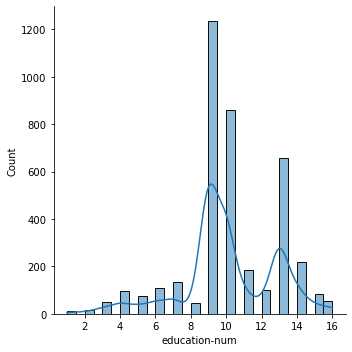

In [39]:
sns.displot(df_joined['education-num'], kde=True, bins=30)

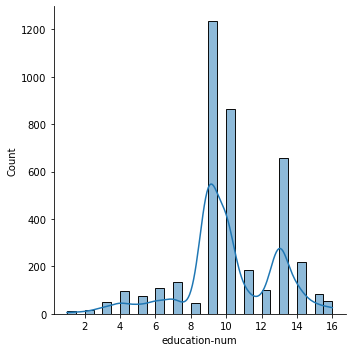

In [40]:
copy_joined['education-num'] = imp.fit_transform(copy_joined[['education-num']])
copy_joined[nan_map]
sns.displot(copy_joined['education-num'], kde=True, bins=30)

Pre atribút education-num bola iba jedna vychýlená hodnota, a preto po jej doplnení to nijako neovplyvnilo rozdelenie distribúcie. Vyzerá to tak, že tomuto atribútu viacej pomôže nahradenie outlierov.

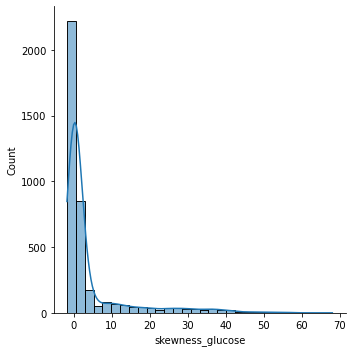

In [41]:
sns.displot(df_joined['skewness_glucose'], kde=True, bins=30)

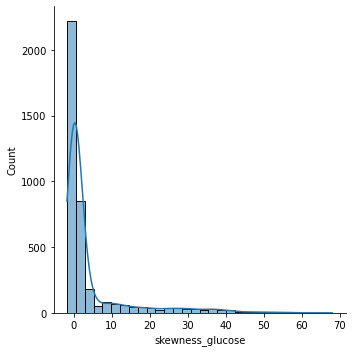

In [42]:
copy_joined['skewness_glucose'] = imp.fit_transform(copy_joined[['skewness_glucose']])
copy_joined[nan_map]
sns.displot(copy_joined['skewness_glucose'], kde=True, bins=30)

Atribút skewness_glucose opäť obsahoval iba jednu, chýbajúcu hodnotu, ktorú keď sme doplnili, tak to distribúciu neupravilo. Avšak niektoré namerané hodnoty sú celkom extrémne oproti priemerným a preto nahradenie vychýlených hodnôt ju môže zlepšiť.

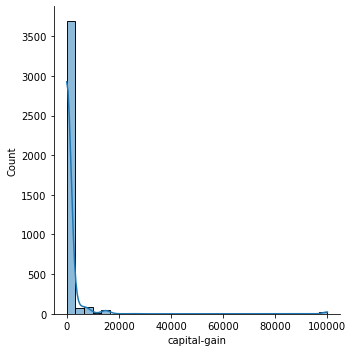

In [43]:
sns.displot(df_joined['capital-gain'], kde=True, bins=30)

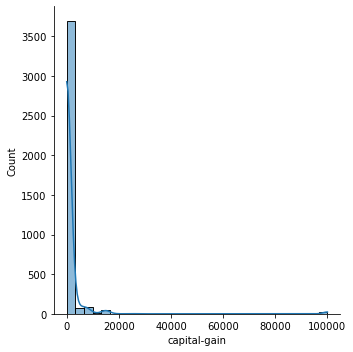

In [44]:
copy_joined['capital-gain'] = imp.fit_transform(copy_joined[['capital-gain']])
copy_joined[nan_map]
sns.displot(copy_joined['capital-gain'], kde=True, bins=30)

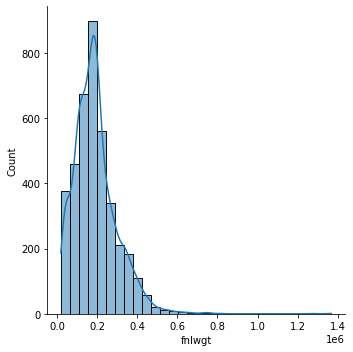

In [45]:
sns.displot(df_joined['fnlwgt'], kde=True, bins=30)

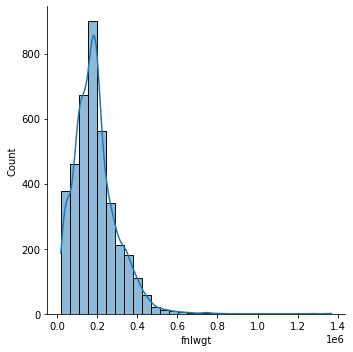

In [46]:
copy_joined['fnlwgt'] = imp.fit_transform(copy_joined[['fnlwgt']])
copy_joined[nan_map]
sns.displot(copy_joined['fnlwgt'], kde=True, bins=30)

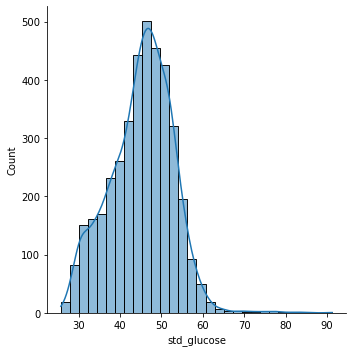

In [47]:
sns.displot(df_joined['std_glucose'], kde=True, bins=30)

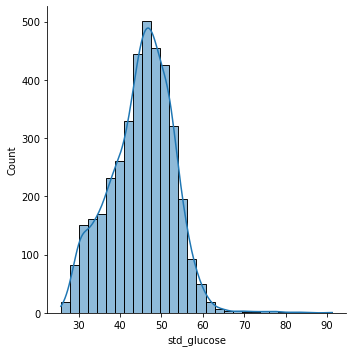

In [48]:
copy_joined['std_glucose'] = imp.fit_transform(copy_joined[['std_glucose']])
copy_joined[nan_map]
sns.displot(copy_joined['std_glucose'], kde=True, bins=30)

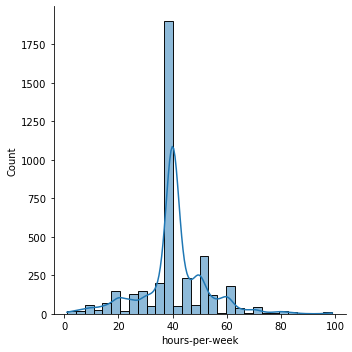

In [49]:
sns.displot(df_joined['hours-per-week'], kde=True, bins=30)

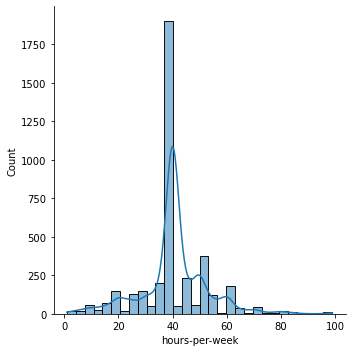

In [50]:
copy_joined['hours-per-week'] = imp.fit_transform(copy_joined[['hours-per-week']])
copy_joined[nan_map]
sns.displot(copy_joined['hours-per-week'], kde=True, bins=30)

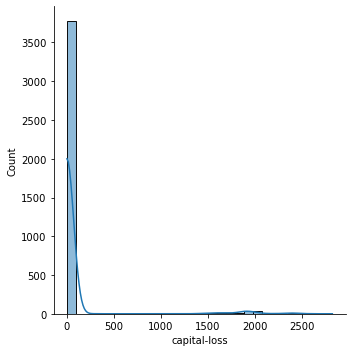

In [51]:
sns.displot(df_joined['capital-loss'], kde=True, bins=30)

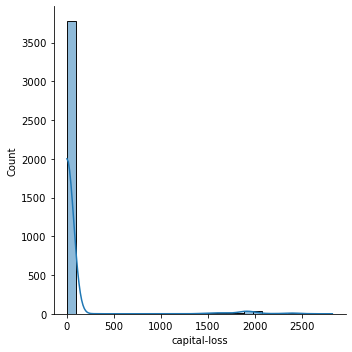

In [52]:
copy_joined['capital-loss'] = imp.fit_transform(copy_joined[['capital-loss']])
copy_joined[nan_map]
sns.displot(copy_joined['capital-loss'], kde=True, bins=30)

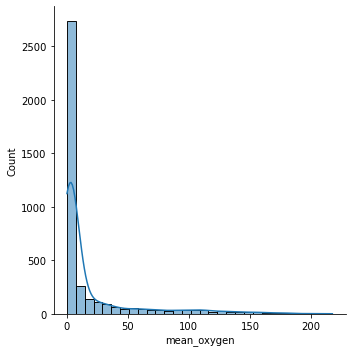

In [53]:
sns.displot(df_joined['mean_oxygen'], kde=True, bins=30)

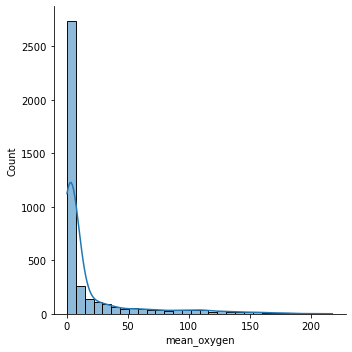

In [54]:
copy_joined['mean_oxygen'] = imp.fit_transform(copy_joined[['mean_oxygen']])
copy_joined[nan_map]
sns.displot(copy_joined['mean_oxygen'], kde=True, bins=30)

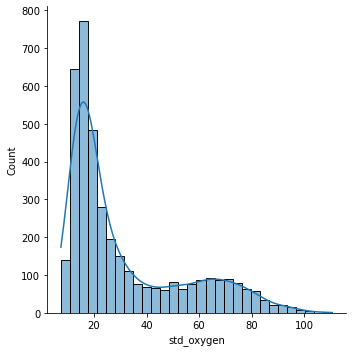

In [55]:
sns.displot(df_joined['std_oxygen'], kde=True, bins=30)

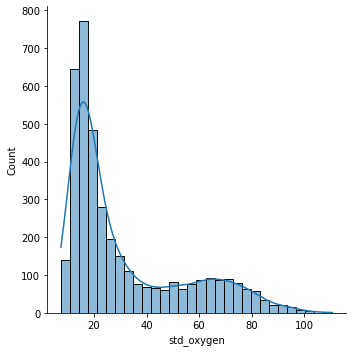

In [56]:
copy_joined['std_oxygen'] = imp.fit_transform(copy_joined[['std_oxygen']])
copy_joined[nan_map]
sns.displot(copy_joined['std_oxygen'], kde=True, bins=30)

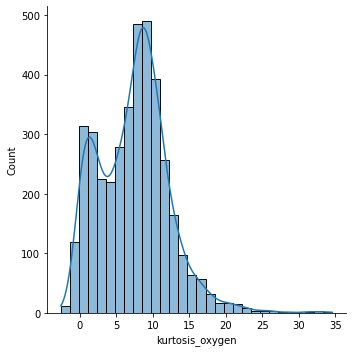

In [57]:
sns.displot(df_joined['kurtosis_oxygen'], kde=True, bins=30)

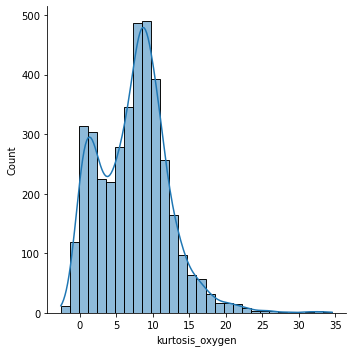

In [58]:
copy_joined['kurtosis_oxygen'] = imp.fit_transform(copy_joined[['kurtosis_oxygen']])
copy_joined[nan_map]
sns.displot(copy_joined['kurtosis_oxygen'], kde=True, bins=30)

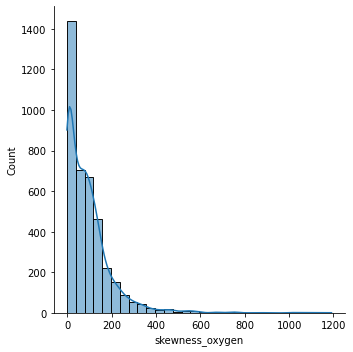

In [59]:
sns.displot(df_joined['skewness_oxygen'], kde=True, bins=30)

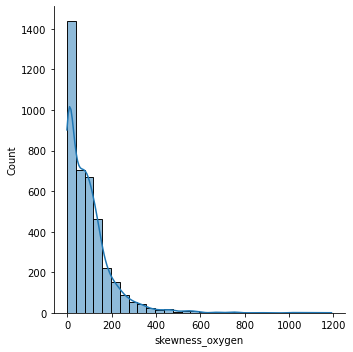

In [60]:
copy_joined['skewness_oxygen'] = imp.fit_transform(copy_joined[['skewness_oxygen']])
copy_joined[nan_map]
sns.displot(copy_joined['skewness_oxygen'], kde=True, bins=30)

Niekotré stĺpce sú zbytočné. Adresu vieme zistiť zo zip kódu, mesto a ulicu teda netreba. V dátach je uvedený vek, preto netreba ani dátum narodenia.

In [61]:
copy_joined = copy_joined.drop(columns=['city', 'street'])

Tu chýbalo priveľa dát, tak namiesto toho, aby sme ich vymazali, označili sme ich za nedefinované.

In [62]:
copy_joined['marital-status'] = copy_joined['marital-status'].replace(np.nan, 'undefined')

Riadky s nekompletnými dátami môžme dropnúť, nie je ich veľa a nedajú sa doplniť. Sú to stringy. 

In [63]:
copy_joined = copy_joined.dropna()

In [64]:
copy_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3653 entries, 0 to 3982
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3653 non-null   object 
 1   race              3653 non-null   object 
 2   marital-status    3653 non-null   object 
 3   occupation        3653 non-null   object 
 4   pregnant          3653 non-null   object 
 5   education-num     3653 non-null   float64
 6   relationship      3653 non-null   object 
 7   skewness_glucose  3653 non-null   float64
 8   mean_glucose      3653 non-null   float64
 9   capital-gain      3653 non-null   float64
 10  kurtosis_glucose  3653 non-null   float64
 11  education         3653 non-null   object 
 12  fnlwgt            3653 non-null   float64
 13  class             3653 non-null   float64
 14  std_glucose       3653 non-null   float64
 15  income            3653 non-null   object 
 16  native-country    3653 non-null   object 


## Zhrnutie doplňania chýbajúcich hodnôt podľa stratégie priemeru
Ako je možné vidieť, postupom času sme prestali opisovať distribúcie grafov, pretože sa stále opakoval ten istý proces, kde doplnenie chýbajúcej hodnoty/hodnôt nezmenilo distribúciou, pretože sa väčšinou dopĺňala jedna, max 2 hodnoty. Iba pre atribút age bolo chýbajúcich hodnôt viac, ale ich doplnenie nám celkom zhoršilo distribúciu. Avšak distribúcie atribútov ako fnlwgt, std_glucose, std_oxygen, kurtosis_oxygen, skewness_oxygen sa celkom podobajú na klasické normálové rozdelenie, len je potrebné vyriešieť problém s outliermi, ktorých tam je kopec.

# Riešenie vychýlených hodnôt

In [65]:
import scipy.stats as stats
from numpy.random import seed
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
from scipy.stats import boxcox
from numpy import percentile
from numpy import mean
from numpy import std
import seaborn as sns
from sklearn import preprocessing
from numpy import exp

In [66]:
## _ = copy_joined.hist(figsize=(18, 12), bins=50)

save = copy_joined

In [67]:
# copy_joined = save 

In [68]:
def borders(df, l, r):
    print('Skewness: ', stats.skew(df))
    return df.quantile(l), df.quantile(r)

In [69]:
def replace_(df, col, left, right):
    df[col] = df[col].replace(df.loc[df[col] < left][col], left)
    df[col] = df[col].replace(df.loc[df[col] > right][col], right)
    return df[col] 

# education-num

Text(0.5, 1.0, 'education-num')

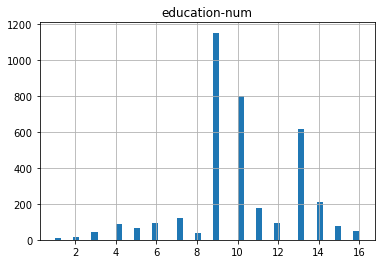

In [70]:
edu_num = copy_joined['education-num'].hist(bins=50)
edu_num.set_title('education-num')

ShapiroResult(statistic=0.9270217418670654, pvalue=5.829212436298555e-39)

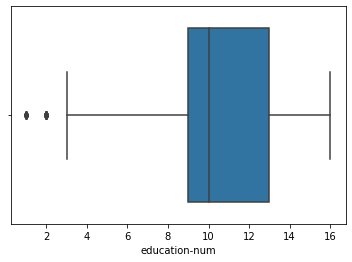

In [71]:
sns.boxplot(x='education-num', data=copy_joined)
stats.shapiro(copy_joined['education-num'])

In [72]:
left, right = borders(copy_joined['education-num'], 0.05, 0.95)
sum(copy_joined['education-num'] < left)

Skewness:  -0.3654282005618575


154

Celkovo je outlierov 154.

Nahradíme ich teda za spodnú hodnotu.

In [73]:
copy_joined['education-num'] = replace_(copy_joined, 'education-num', left, right)

Dáta sú nahradené krajnými hodnotami.

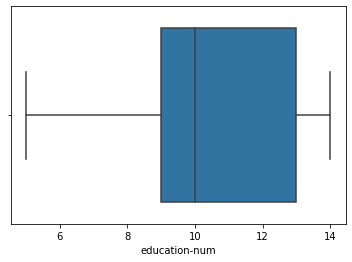

In [74]:
sns.boxplot(x='education-num', data=copy_joined)

ShapiroResult(statistic=0.909565806388855, pvalue=3.4205695514168785e-42)

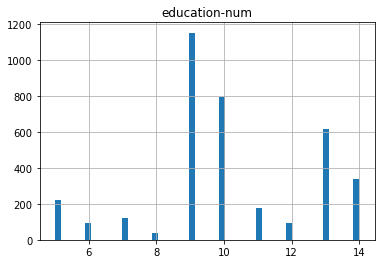

In [75]:
edu_num = copy_joined['education-num'].hist(bins=50)
edu_num.set_title('education-num')
stats.shapiro(copy_joined['education-num'])

# skewness_glucose

ShapiroResult(statistic=0.5273264646530151, pvalue=0.0)

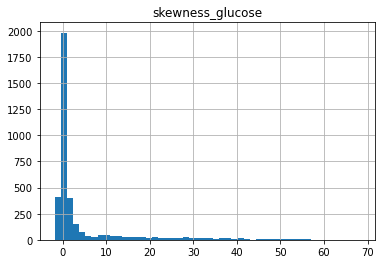

In [76]:
skew_glu = copy_joined['skewness_glucose'].hist(bins=50)
skew_glu.set_title('skewness_glucose')
stats.shapiro(copy_joined['skewness_glucose'])

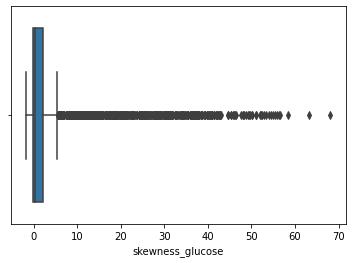

In [77]:
sns.boxplot(x='skewness_glucose', data=copy_joined)

In [78]:
left, right = borders(copy_joined['skewness_glucose'], 0.05, 0.95)
sum(copy_joined['skewness_glucose'] < left) + sum(copy_joined['skewness_glucose'] > right)

Skewness:  2.8974148378061795


366

In [79]:
# copy_joined['skewness_glucose'] = replace_(copy_joined, 'skewness_glucose', left, right)
for i in copy_joined.index:
    if ((copy_joined.loc[i]['skewness_glucose'] > right) or (copy_joined.loc[i]['skewness_glucose'] < left)):
        copy_joined = copy_joined.drop([i])

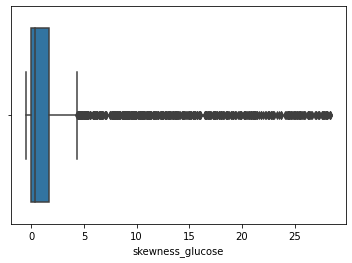

In [80]:
sns.boxplot(x='skewness_glucose', data=copy_joined)

Skewness:  2.7628893115621636


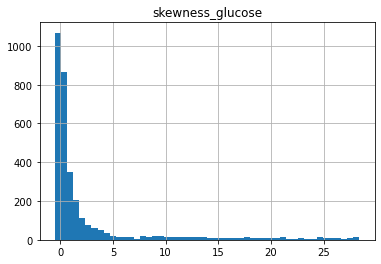

In [81]:
pom = copy_joined['skewness_glucose'].hist(bins=50)
pom.set_title('skewness_glucose')

print('Skewness: ', stats.skew(copy_joined['skewness_glucose']))

Logaritmická transformácia

Skewness: nan


C:\Users\vanco\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


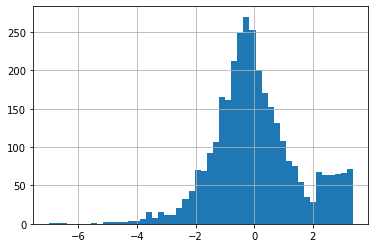

In [82]:
transformed = np.log(copy_joined['skewness_glucose'] + 0.5) # zbavíme sa záporných čísel
pom = pd.Series(transformed).hist(bins=50)
print("Skewness:", stats.skew(transformed))

# mean_glucose

Podľa bežných hodnôt tohto stĺpca sme inentifikovali, že bežná hodnota sa pohybuje do 200. niektoré hodnoty ako -20000 nedávali zmysel a preto sme ich vydelili 1000.

In [83]:
copy_joined['mean_glucose'].loc[copy_joined['mean_glucose'] > 1000] /= 1000
copy_joined['mean_glucose'].loc[copy_joined['mean_glucose'] < -1000] /= 1000
# copy_joined['mean_glucose'].loc[copy_joined['mean_glucose'] < 50] += 100

C:\Users\vanco\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ShapiroResult(statistic=0.8711680769920349, pvalue=0.0)

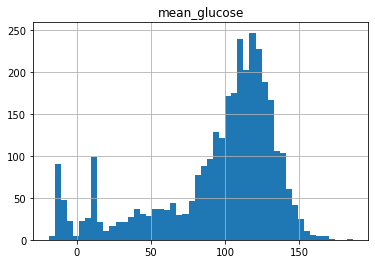

In [84]:
mean_glu = copy_joined['mean_glucose'].hist(bins=50)
mean_glu.set_title('mean_glucose')
stats.shapiro(copy_joined['mean_glucose'])

In [85]:
left, right = borders(copy_joined['mean_glucose'], 0.05, 0.95)
sum(copy_joined['mean_glucose'] < left) + sum(copy_joined['mean_glucose'] > right)

Skewness:  -1.163939235761975


330

In [86]:
copy_joined['mean_glucose'] = replace_(copy_joined, 'mean_glucose', left, right)

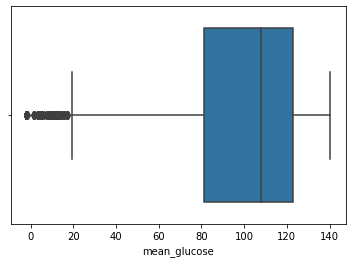

In [87]:
sns.boxplot(x='mean_glucose', data=copy_joined)

Skewness:  -1.1577166363791915


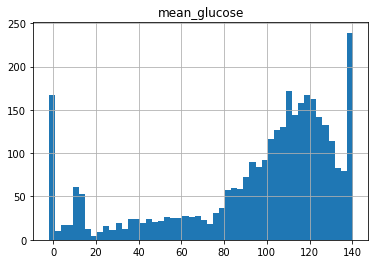

In [88]:
pom = copy_joined['mean_glucose'].hist(bins=50)
pom.set_title('mean_glucose')

print('Skewness: ', stats.skew(copy_joined['mean_glucose']))

Skewness: -2.9134186393195973


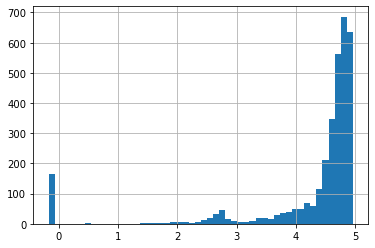

In [89]:
transformed = np.log(copy_joined['mean_glucose'] + 3) # zbavíme sa záporných čísel
pom = pd.Series(transformed).hist(bins=50)
print("Skewness:", stats.skew(transformed))

# capital-gain a capital-loss - same 0, ziadna vypovedna hodnota

In [90]:
copy_joined = copy_joined.drop(columns=['capital-gain', 'capital-gain']) 

# kurtosis_glucose

ShapiroResult(statistic=0.7121396660804749, pvalue=0.0)

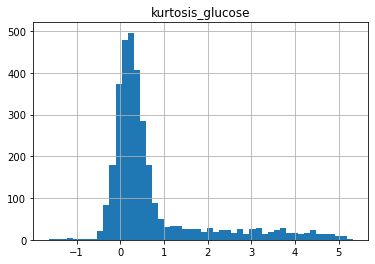

In [91]:
kurt_glu = copy_joined['kurtosis_glucose'].hist(bins=50)
kurt_glu.set_title('kurtosis_glucose')
stats.shapiro(copy_joined['kurtosis_glucose'])

In [92]:
left, right = borders(copy_joined['kurtosis_glucose'], 0.05, 0.95)
sum(copy_joined['kurtosis_glucose'] < left) + sum(copy_joined['kurtosis_glucose'] > right)
copy_joined['kurtosis_glucose'] = replace_(copy_joined, 'kurtosis_glucose', left, right)

Skewness:  2.015252510434082


Skewness: 1.138894386572163


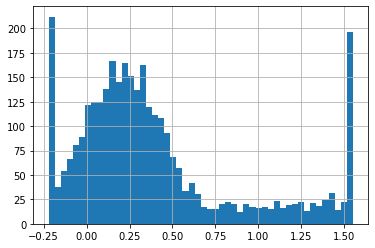

In [93]:
transformed = np.log(copy_joined['kurtosis_glucose'] + 1) # zbavíme sa záporných čísel
pom = pd.Series(transformed).hist(bins=50)
print("Skewness:", stats.skew(transformed))

# fnlwgt

ShapiroResult(statistic=0.9153812527656555, pvalue=1.756578071775874e-39)

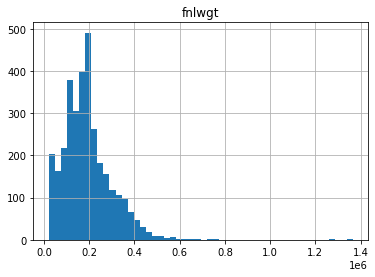

In [94]:
fnl = copy_joined['fnlwgt'].hist(bins=50)
fnl.set_title('fnlwgt')
stats.shapiro(copy_joined['fnlwgt'])

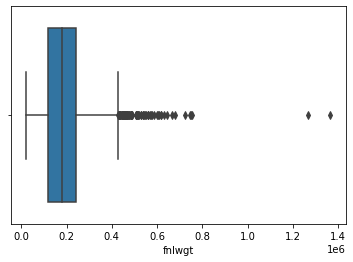

In [95]:
sns.boxplot(x='fnlwgt', data=copy_joined)

In [96]:
copy_joined['fnlwgt'].loc[copy_joined['fnlwgt'] > 1] -= 1

C:\Users\vanco\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [97]:
left, right = borders(copy_joined['fnlwgt'], 0.05, 0.95)
sum(copy_joined['fnlwgt'] < left) + sum(copy_joined['fnlwgt'] > right)
copy_joined['fnlwgt'] = replace_(copy_joined, 'fnlwgt', left, right)

Skewness:  1.5964668366220018


Skewness: -0.7301163102842442


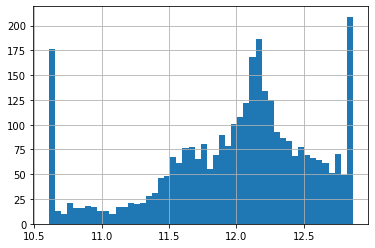

In [98]:
transformed = np.log(copy_joined['fnlwgt'] + 1) # zbavíme sa záporných čísel
pom = pd.Series(transformed).hist(bins=50)
print("Skewness:", stats.skew(transformed))

# std_glucose

ShapiroResult(statistic=0.9882072806358337, pvalue=6.534321851541013e-16)

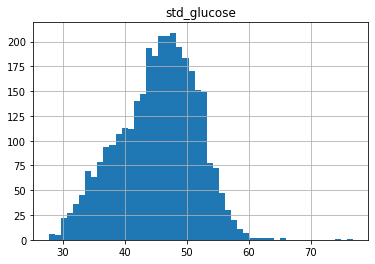

In [99]:
std_glu = copy_joined['std_glucose'].hist(bins=50)
std_glu.set_title('std_glucose')
stats.shapiro(copy_joined['std_glucose'])

In [100]:
left, right = borders(copy_joined['std_glucose'], 0.05, 0.95)
sum(copy_joined['std_glucose'] < left) + sum(copy_joined['std_glucose'] > right)
copy_joined['std_glucose'] = replace_(copy_joined, 'std_glucose', left, right)

Skewness:  -0.2178578878128761


Skewness: -0.5123622813341181


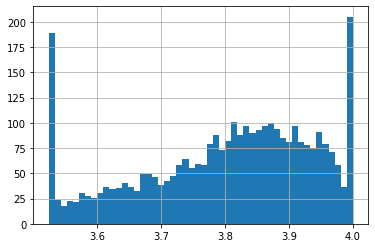

In [101]:
transformed = np.log(copy_joined['std_glucose']) # zbavíme sa záporných čísel
pom = pd.Series(transformed).hist(bins=50)
print("Skewness:", stats.skew(transformed))

# hours-per-week

ShapiroResult(statistic=0.8908019661903381, pvalue=2.368194404708941e-43)

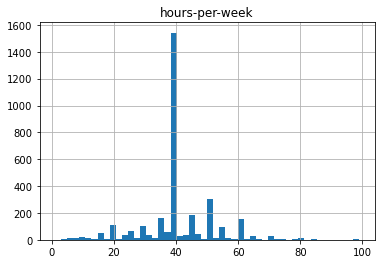

In [102]:
hpw = copy_joined['hours-per-week'].hist(bins=50)
hpw.set_title('hours-per-week')
stats.shapiro(copy_joined['hours-per-week'])

In [103]:
left, right = borders(copy_joined['hours-per-week'], 0.05, 0.95)
sum(copy_joined['hours-per-week'] < left) + sum(copy_joined['hours-per-week'] > right)
copy_joined['hours-per-week'] = replace_(copy_joined, 'hours-per-week', left, right)

Skewness:  0.2905001123400469


ShapiroResult(statistic=0.8931096792221069, pvalue=5.086713425499086e-43)

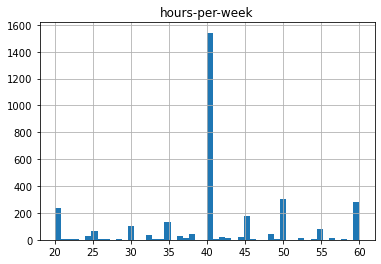

In [104]:
hpw = copy_joined['hours-per-week'].hist(bins=50)
hpw.set_title('hours-per-week')
stats.shapiro(copy_joined['hours-per-week'])

# mean_oxygen

ShapiroResult(statistic=0.4976084232330322, pvalue=0.0)

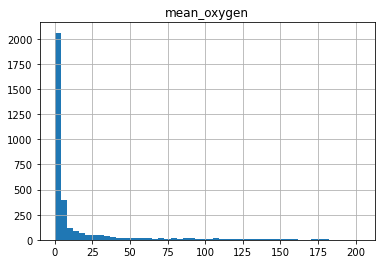

In [105]:
mean_ox = copy_joined['mean_oxygen'].hist(bins=50)
mean_ox.set_title('mean_oxygen')
stats.shapiro(copy_joined['mean_oxygen'])

In [106]:
left, right = borders(copy_joined['mean_oxygen'], 0.05, 0.95)
sum(copy_joined['mean_oxygen'] < left) + sum(copy_joined['mean_oxygen'] > right)
copy_joined['mean_oxygen'] = replace_(copy_joined, 'mean_oxygen', left, right)

Skewness:  3.1285327998186783


Skewness: 1.055195797997233


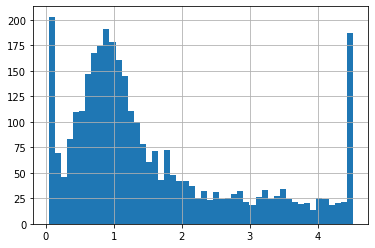

In [107]:
transformed = np.log(copy_joined['mean_oxygen'])
pom = pd.Series(transformed).hist(bins=50)
print("Skewness:", stats.skew(transformed))

# std_oxygen

ShapiroResult(statistic=0.7862520217895508, pvalue=0.0)

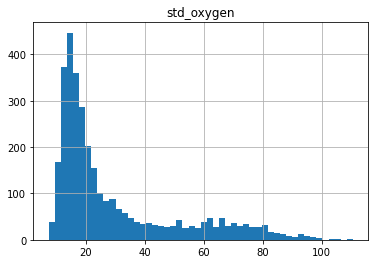

In [108]:
std_ox = copy_joined['std_oxygen'].hist(bins=50)
std_ox.set_title('std_oxygen')
stats.shapiro(copy_joined['std_oxygen'])

In [109]:
left, right = borders(copy_joined['std_oxygen'], 0.05, 0.95)
sum(copy_joined['std_oxygen'] < left) + sum(copy_joined['std_oxygen'] > right)
copy_joined['std_oxygen'] = replace_(copy_joined, 'std_oxygen', left, right)

Skewness:  1.4232901906960838


Skewness: 0.6872806604653289


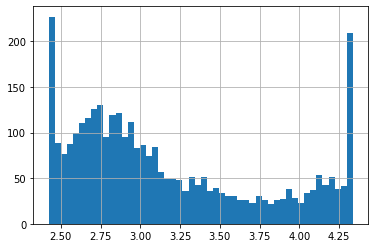

In [110]:
transformed = np.log(copy_joined['std_oxygen'])
pom = pd.Series(transformed).hist(bins=50)
print("Skewness:", stats.skew(transformed))

# kurtosis_oxygen

ShapiroResult(statistic=0.9699631929397583, pvalue=1.0694726575334835e-25)

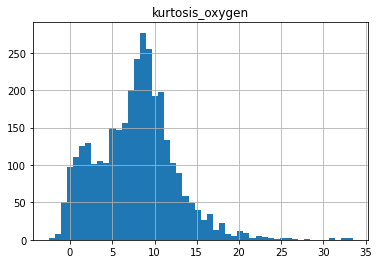

In [111]:
kur_ox = copy_joined['kurtosis_oxygen'].hist(bins=50)
kur_ox.set_title('kurtosis_oxygen')
stats.shapiro(copy_joined['kurtosis_oxygen'])

In [112]:
left, right = borders(copy_joined['kurtosis_oxygen'], 0.05, 0.95)
sum(copy_joined['kurtosis_oxygen'] < left) + sum(copy_joined['kurtosis_oxygen'] > right)
copy_joined['kurtosis_oxygen'] = replace_(copy_joined, 'kurtosis_oxygen', left, right)

Skewness:  0.5760020409830668


Skewness: -1.1348883015955455


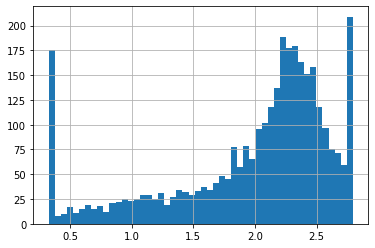

In [113]:
transformed = np.log(copy_joined['kurtosis_oxygen'] + 1)
pom = pd.Series(transformed).hist(bins=50)
print("Skewness:", stats.skew(transformed))

# skewness_oxygen

ShapiroResult(statistic=0.7539091110229492, pvalue=0.0)

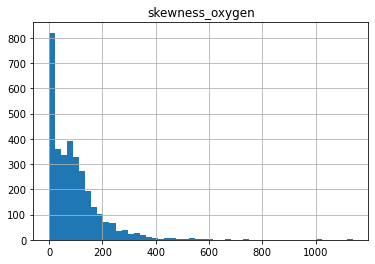

In [114]:
skew_ox = copy_joined['skewness_oxygen'].hist(bins=50)
skew_ox.set_title('skewness_oxygen')
stats.shapiro(copy_joined['skewness_oxygen'])

In [115]:
left, right = borders(copy_joined['skewness_oxygen'], 0.05, 0.95)
sum(copy_joined['skewness_oxygen'] < left) + sum(copy_joined['skewness_oxygen'] > right)
copy_joined['skewness_oxygen'] = replace_(copy_joined, 'skewness_oxygen', left, right)

Skewness:  3.0586674148608264


Skewness: -0.7977753561103125


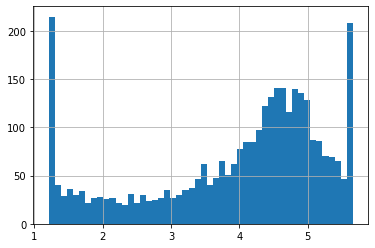

In [116]:
transformed = np.log(copy_joined['skewness_oxygen'] + 4)
pom = pd.Series(transformed).hist(bins=50)
print("Skewness:", stats.skew(transformed))

# age

ShapiroResult(statistic=0.9961646199226379, pvalue=1.8237074073113035e-07)

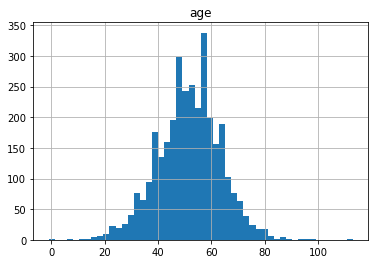

In [117]:
age = copy_joined['age'].hist(bins=50)
age.set_title('age')
stats.shapiro(copy_joined['age'])

In [118]:
left, right = borders(copy_joined['age'], 0.01, 0.99)
sum(copy_joined['age'] < left) + sum(copy_joined['age'] > right)
copy_joined['age'] = replace_(copy_joined, 'age', left, right)

Skewness:  -0.0845912916716841


ShapiroResult(statistic=0.995177149772644, pvalue=6.754523607099827e-09)

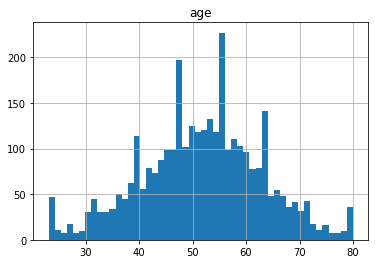

In [119]:
age = copy_joined['age'].hist(bins=50)
age.set_title('age')
stats.shapiro(copy_joined['age'])

In [120]:
copy_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 0 to 3982
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3287 non-null   object 
 1   race              3287 non-null   object 
 2   marital-status    3287 non-null   object 
 3   occupation        3287 non-null   object 
 4   pregnant          3287 non-null   object 
 5   education-num     3287 non-null   float64
 6   relationship      3287 non-null   object 
 7   skewness_glucose  3287 non-null   float64
 8   mean_glucose      3287 non-null   float64
 9   kurtosis_glucose  3287 non-null   float64
 10  education         3287 non-null   object 
 11  fnlwgt            3287 non-null   float64
 12  class             3287 non-null   float64
 13  std_glucose       3287 non-null   float64
 14  income            3287 non-null   object 
 15  native-country    3287 non-null   object 
 16  hours-per-week    3287 non-null   float64


In [ ]:
for i in copy_joined.index:
    if ((copy_joined.loc[i]['skewness_glucose'] > whisker_r) or (copy_joined.loc[i]['skewness_glucose'] < whisker_l)):
        copy_joined = copy_joined.drop([i])

Eliminovanie outlierov - v našom prípade najmä chorých. To je správne?

Tomuto nechápem

In [ ]:
transformed = np.log(copy_joined['skewness_glucose']+2) # zbavíme sa záporných čísel, aby šli zlogaritmovať
pom = pd.Series(transformed).hist(bins = 50)
print("Skewness:", stats.skew(transformed))

In [ ]:
seaborn.boxplot(transformed)

In [ ]:
from scipy.stats import boxcox

In [ ]:
transformed, att = boxcox(copy_joined['skewness_glucose'] + 2)# boxcox vrati transformovane data a parametre transformacie. Tie viem zafixovat a v tom pripade mi to vrati len transformovane data
pom = pd.Series(transformed).hist(bins=50)
print(att)

In [ ]:
(copy_joined['skewness_glucose']).count()

In [ ]:
# calculate summary statistics
data_mean, data_std = mean(copy_joined['skewness_glucose']), std(copy_joined['skewness_glucose'])
print('len=', len(copy_joined['skewness_glucose']), 'mean=', data_mean, 'std=', data_std)

# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off 
print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

# identify outliers
outliers = [x for x in copy_joined['skewness_glucose'] if x < lower or x > upper] 
print('Identified outliers: %d' % len(outliers))

# remove outliers
for i in copy_joined.index:
    if ((copy_joined.loc[i]['skewness_glucose'] >= upper) or (copy_joined.loc[i]['skewness_glucose'] <= lower)):
        copy_joined = copy_joined.drop([i])


In [ ]:
(copy_joined['skewness_glucose']).count()

In [ ]:
pom = copy_joined['skewness_glucose'].hist(bins=50)
pom.set_title('skewness_glucose')

print('Skewness: ', stats.skew(copy_joined['skewness_glucose']))

# Riešenie chýbajúcich hodnôt druhá stratégia

# Transformácia atribútu/ov pomocou Power transform (logaritmus, odmocnina a pod.)

# Opätovná realizácia podstatných častí prieskumnej analýzy


    Očakáva sa že dokumentujete zmeny distribúcie hodnôt po realizácii predspracovania
    Následne dokumentujete LEN zmeny v prieskumnej analýze